In [1]:
#set the current working directory according to requirements
import os
os.chdir('D:\\Projects\\datasets\\Dogs_vs_Cats')
import cv2
import tqdm
from random import shuffle
from keras.models import Sequential,model_from_json
from keras.layers import *
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.python.keras.applications.resnet50 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
#A one hot encoding function
def one_hot_encoder(img):
    label=img.split('.')[0]
    if label=='cat':
        ohl=np.array([1,0])
    else:
        ohl=np.array([0,1])
    return ohl 

In [3]:
#loading images/preprocessing them
path1='train/'
path2='test1/'
# imgs=os.listdir(path1)

In [4]:
def feature_extractor():
    train_images=[]
    for i in tqdm.tqdm(os.listdir(path1)):
        path=os.path.join(path1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        train_images.append([np.array(img),one_hot_encoder(i)])
    shuffle(train_images)
    return train_images
def test_data_reader():
    test_images=[]
    for i in tqdm.tqdm(os.listdir(path2)):
        path=os.path.join(path2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        test_images.append([np.array(img),one_hot_encoder(i)])
    return test_images

In [5]:
training_images = feature_extractor()
testing_images = test_data_reader()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:29<00:00, 140.40it/s]


In [6]:
model=Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
optimizer=Adam(lr=1e-3)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
25000/25000 [==============================] - ETA: 14:18 - loss: 6.6075 - acc: 0.39 - ETA: 3:36 - loss: 5.1717 - acc: 0.4700 - ETA: 2:04 - loss: 4.3195 - acc: 0.481 - ETA: 1:27 - loss: 3.4665 - acc: 0.485 - ETA: 1:07 - loss: 2.8727 - acc: 0.491 - ETA: 55s - loss: 2.4758 - acc: 0.495 - ETA: 46s - loss: 2.1974 - acc: 0.48 - ETA: 40s - loss: 1.9928 - acc: 0.49 - ETA: 35s - loss: 1.8365 - acc: 0.49 - ETA: 31s - loss: 1.7144 - acc: 0.49 - ETA: 28s - loss: 1.6152 - acc: 0.49 - ETA: 26s - loss: 1.5337 - acc: 0.49 - ETA: 24s - loss: 1.4656 - acc: 0.49 - ETA: 22s - loss: 1.4068 - acc: 0.50 - ETA: 20s - loss: 1.3568 - acc: 0.50 - ETA: 19s - loss: 1.3137 - acc: 0.50 - ETA: 18s - loss: 1.2754 - acc: 0.50 - ETA: 17s - loss: 1.2416 - acc: 0.50 - ETA: 16s - loss: 1.2121 - acc: 0.50 - ETA: 15s - loss: 1.1853 - acc: 0.50 - ETA: 14s - loss: 1.1608 - acc: 0.51 - ETA: 13s - loss: 1.1387 - acc: 0.51 - ETA: 13s - loss: 1.1186 - acc: 0.51 - ETA: 12s - loss: 1.1005 - acc: 0.51 - ETA: 12s - loss: 1

25000/25000 [==============================] - ETA: 5s - loss: 0.6829 - acc: 0.580 - ETA: 5s - loss: 0.6813 - acc: 0.572 - ETA: 5s - loss: 0.6829 - acc: 0.561 - ETA: 5s - loss: 0.6821 - acc: 0.562 - ETA: 5s - loss: 0.6826 - acc: 0.565 - ETA: 4s - loss: 0.6844 - acc: 0.557 - ETA: 4s - loss: 0.6873 - acc: 0.543 - ETA: 4s - loss: 0.6865 - acc: 0.543 - ETA: 4s - loss: 0.6855 - acc: 0.544 - ETA: 4s - loss: 0.6864 - acc: 0.544 - ETA: 4s - loss: 0.6854 - acc: 0.544 - ETA: 4s - loss: 0.6854 - acc: 0.544 - ETA: 4s - loss: 0.6866 - acc: 0.540 - ETA: 4s - loss: 0.6876 - acc: 0.533 - ETA: 4s - loss: 0.6878 - acc: 0.530 - ETA: 4s - loss: 0.6872 - acc: 0.536 - ETA: 4s - loss: 0.6863 - acc: 0.537 - ETA: 4s - loss: 0.6865 - acc: 0.536 - ETA: 4s - loss: 0.6863 - acc: 0.537 - ETA: 4s - loss: 0.6865 - acc: 0.539 - ETA: 4s - loss: 0.6865 - acc: 0.540 - ETA: 3s - loss: 0.6860 - acc: 0.543 - ETA: 3s - loss: 0.6857 - acc: 0.542 - ETA: 3s - loss: 0.6847 - acc: 0.544 - ETA: 3s - loss: 0.6856 - acc: 0.543 - ETA

25000/25000 [==============================] - ETA: 5s - loss: 0.6726 - acc: 0.570 - ETA: 5s - loss: 0.6718 - acc: 0.605 - ETA: 5s - loss: 0.6797 - acc: 0.592 - ETA: 5s - loss: 0.6788 - acc: 0.588 - ETA: 5s - loss: 0.6833 - acc: 0.567 - ETA: 4s - loss: 0.6802 - acc: 0.581 - ETA: 4s - loss: 0.6806 - acc: 0.579 - ETA: 4s - loss: 0.6824 - acc: 0.577 - ETA: 4s - loss: 0.6810 - acc: 0.584 - ETA: 4s - loss: 0.6820 - acc: 0.579 - ETA: 4s - loss: 0.6796 - acc: 0.582 - ETA: 4s - loss: 0.6798 - acc: 0.578 - ETA: 4s - loss: 0.6802 - acc: 0.575 - ETA: 4s - loss: 0.6800 - acc: 0.575 - ETA: 4s - loss: 0.6796 - acc: 0.576 - ETA: 4s - loss: 0.6804 - acc: 0.573 - ETA: 4s - loss: 0.6809 - acc: 0.574 - ETA: 4s - loss: 0.6799 - acc: 0.575 - ETA: 4s - loss: 0.6794 - acc: 0.573 - ETA: 4s - loss: 0.6808 - acc: 0.569 - ETA: 3s - loss: 0.6819 - acc: 0.568 - ETA: 3s - loss: 0.6834 - acc: 0.565 - ETA: 3s - loss: 0.6826 - acc: 0.567 - ETA: 3s - loss: 0.6829 - acc: 0.565 - ETA: 3s - loss: 0.6829 - acc: 0.564 - ETA

25000/25000 [==============================] - ETA: 5s - loss: 0.6635 - acc: 0.580 - ETA: 5s - loss: 0.6696 - acc: 0.605 - ETA: 5s - loss: 0.6629 - acc: 0.615 - ETA: 5s - loss: 0.6656 - acc: 0.609 - ETA: 5s - loss: 0.6685 - acc: 0.603 - ETA: 4s - loss: 0.6676 - acc: 0.600 - ETA: 4s - loss: 0.6680 - acc: 0.596 - ETA: 4s - loss: 0.6692 - acc: 0.594 - ETA: 4s - loss: 0.6688 - acc: 0.593 - ETA: 4s - loss: 0.6664 - acc: 0.595 - ETA: 4s - loss: 0.6686 - acc: 0.591 - ETA: 4s - loss: 0.6712 - acc: 0.587 - ETA: 4s - loss: 0.6698 - acc: 0.587 - ETA: 4s - loss: 0.6707 - acc: 0.588 - ETA: 4s - loss: 0.6713 - acc: 0.584 - ETA: 4s - loss: 0.6716 - acc: 0.586 - ETA: 4s - loss: 0.6714 - acc: 0.586 - ETA: 4s - loss: 0.6708 - acc: 0.587 - ETA: 4s - loss: 0.6711 - acc: 0.587 - ETA: 4s - loss: 0.6709 - acc: 0.585 - ETA: 3s - loss: 0.6714 - acc: 0.584 - ETA: 3s - loss: 0.6719 - acc: 0.583 - ETA: 3s - loss: 0.6717 - acc: 0.583 - ETA: 3s - loss: 0.6722 - acc: 0.582 - ETA: 3s - loss: 0.6720 - acc: 0.583 - ETA

KeyboardInterrupt: 

In [8]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

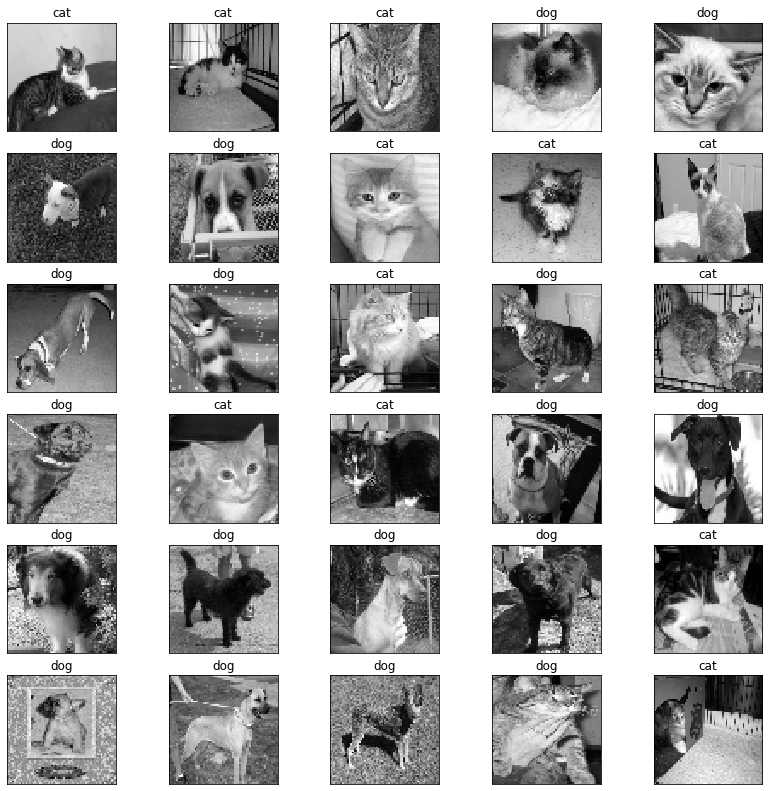

In [7]:
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate(testing_images[10:40]):
    y=fig.add_subplot(6,5,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label='dog'
    else:
        str_label='cat'
        
    y=plt.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)